# Data set analisys

In [13]:
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split,KFold, cross_val_score,cross_val_predict,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import export_graphviz
from statistics import mean
from subprocess import call
from IPython.display import Image

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time

warnings.filterwarnings("ignore")
col_names = ['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info','src_port','dst_port']
data_frame = pd.read_csv("Samples/smallTraffic-_backup.csv",encoding = "ISO-8859-1", header=0, names=col_names)

data_frame

,Time,Source,Destination,Protocol,Length,Info,src_port,dst_port
1,0.000000,192.168.3.131,72.14.213.138,HTTP,997,GET /complete/search?client=chrome&hl=en-US&q=...,57011.0,80.0
2,0.029841,72.14.213.138,192.168.3.131,HTTP,440,HTTP/1.1 200 OK (text/javascript),80.0,57011.0
3,0.223883,192.168.3.131,72.14.213.102,TCP,66,55950 > 80 [SYN] Seq=0 Win=8192 Len=0 MSS=14...,55950.0,80.0
4,0.229423,192.168.3.131,72.14.213.138,TCP,54,57011 > 80 [ACK] Seq=944 Ack=387 Win=16192 L...,57011.0,80.0
5,0.242649,72.14.213.102,192.168.3.131,TCP,66,"80 > 55950 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",80.0,55950.0
...,...,...,...,...,...,...,...,...
14257,298.284563,10.0.2.15,65.54.167.27,TCP,54,"2548 > 5480 [RST, ACK] Seq=1902 Ack=42479 Wi...",2548.0,5480.0
14258,298.303019,192.168.3.131,255.255.255.255,DB-LSP-DISC,162,Dropbox LAN sync Discovery Protocol,17500.0,17500.0
14259,298.305344,192.168.3.131,192.168.3.255,DB-LSP-DISC,162,Dropbox LAN sync Discovery Protocol,17500.0,17500.0
14260,298.503019,192.168.3.131,255.255.255.255,DB-LSP-DISC,162,Dropbox LAN sync Discovery Protocol,17500.0,17500.0


In [2]:
print(data_frame.shape)

(14261, 8)


In [3]:
print(data_frame.columns)

Index(['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'src_port', 'dst_port'],
      dtype='object')


In [14]:
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14261 entries, 1 to 14261
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         14261 non-null  float64
 1   Source       14261 non-null  object 
 2   Destination  14261 non-null  object 
 3   Protocol     14261 non-null  object 
 4   Length       14261 non-null  int64  
 5   Info         14261 non-null  object 
 6   src_port     14231 non-null  float64
 7   dst_port     14231 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1002.7+ KB
None


In [15]:
data_frame.describe()

,Time,Length,src_port,dst_port
count,14261.000000,14261.000000,14231.000000,14231.000000
mean,142.233326,646.275226,19948.689340,27239.426112
std,81.431385,662.109126,25650.721107,26830.230776
min,0.000000,42.000000,53.000000,53.000000
25%,67.264919,54.000000,80.000000,443.000000
50%,132.903516,161.000000,1863.000000,10641.000000
75%,198.705664,1514.000000,56048.000000,56331.000000
max,298.505344,1514.000000,64982.000000,64982.000000


In [6]:
data_frame.describe(include=['object', 'bool'])

,Source,Destination,Protocol,Info
count,14261,14261,14261,14261
unique,209,224,22,11615
top,192.168.3.131,192.168.3.131,TCP,Application Data
freq,4294,6184,10732,614


In [16]:
#Count values
data_frame['Protocol'].value_counts()

TCP            10732
TLSv1           1701
HTTP            1059
UDP              324
MSNMS             82
DNS               68
HTTP/XML          62
SSDP              42
SSLv3             40
ICMP              34
ARP               18
DB-LSP-DISC       16
SSLv2             16
SNMP              16
SMB               15
NBNS              15
NAT-PMP           10
LLMNR              4
DHCP               3
BROWSER            2
RTCP               1
NBSS               1
Name: Protocol, dtype: int64

In [8]:
#Count values and display %
data_frame['Protocol'].value_counts(normalize=True)

TCP            0.752542
TLSv1          0.119276
HTTP           0.074258
UDP            0.022719
MSNMS          0.005750
DNS            0.004768
HTTP/XML       0.004348
SSDP           0.002945
SSLv3          0.002805
ICMP           0.002384
ARP            0.001262
DB-LSP-DISC    0.001122
SSLv2          0.001122
SNMP           0.001122
SMB            0.001052
NBNS           0.001052
NAT-PMP        0.000701
LLMNR          0.000280
DHCP           0.000210
BROWSER        0.000140
RTCP           0.000070
NBSS           0.000070
Name: Protocol, dtype: float64

In [9]:
data_frame.sort_values(by='src_port', ascending=False).head(25)

,Time,Source,Destination,Protocol,Length,Info,src_port,dst_port
6119,117.660528,10.0.2.15,10.0.2.3,DNS,81,Standard query 0xf99d A www.gowindowslive.com,64982.0,53.0
11285,227.660528,10.0.2.15,10.0.2.3,DNS,81,Standard query 0xf99d A www.gowindowslive.com,64982.0,53.0
6056,117.333187,70.80.140.19,172.16.255.1,UDP,533,64588 > 50983 Len=491,64588.0,50983.0
6527,122.877205,110.67.111.103,172.16.255.1,UDP,60,64228 > 50983 Len=18,64228.0,50983.0
13787,292.377084,172.16.255.1,172.16.0.1,NAT-PMP,54,Map UDP Request,63805.0,5351.0
13817,292.638125,172.16.255.1,172.16.0.1,NAT-PMP,54,Map UDP Request,63805.0,5351.0
13784,292.375669,172.16.255.1,239.255.255.250,SSDP,174,M-SEARCH * HTTP/1.1,63802.0,1900.0
13782,292.375594,172.16.255.1,239.255.255.250,SSDP,175,M-SEARCH * HTTP/1.1,63802.0,1900.0
4315,108.245441,190.213.76.21,172.16.255.1,UDP,60,62669 > 50983 Len=17,62669.0,50983.0
6258,119.533294,111.250.201.8,172.16.255.1,UDP,498,62599 > 50983 Len=456,62599.0,50983.0


In [10]:
arrayOfProtocols = data_frame['Protocol'].unique()
arrayOfLengths = []
arrayOfCountProtocols = []
arrayOfMin = []
arrayOfMax = []

for x in arrayOfProtocols:
    arrayOfLengths.append(data_frame.loc[data_frame['Protocol'] == x, 'Length'].mean())
    arrayOfMin.append(data_frame.loc[data_frame['Protocol'] == x, 'Length'].min())
    arrayOfMax.append(data_frame.loc[data_frame['Protocol'] == x, 'Length'].max())
    arrayOfCountProtocols.append(list(data_frame.Protocol.to_numpy()).count(x)) 

d = {
    'Protocol': arrayOfProtocols,
    'Packet length mean': arrayOfLengths,
    'Max': arrayOfMax,
    'Min': arrayOfMin,
    'Count': arrayOfCountProtocols
}

df = pd.DataFrame(data=d).round(2)

df

,Protocol,Packet length mean,Max,Min,Count
0,HTTP,735.22,1514,60,1059
1,TCP,631.71,1514,54,10732
2,TLSv1,868.76,1514,57,1701
3,HTTP/XML,776.74,1471,165,62
4,SSDP,172.12,175,165,42
5,DHCP,342.00,342,342,3
6,LLMNR,64.00,64,64,4
7,ARP,51.00,60,42,18
8,UDP,142.94,869,60,324
9,NBNS,92.00,92,92,15


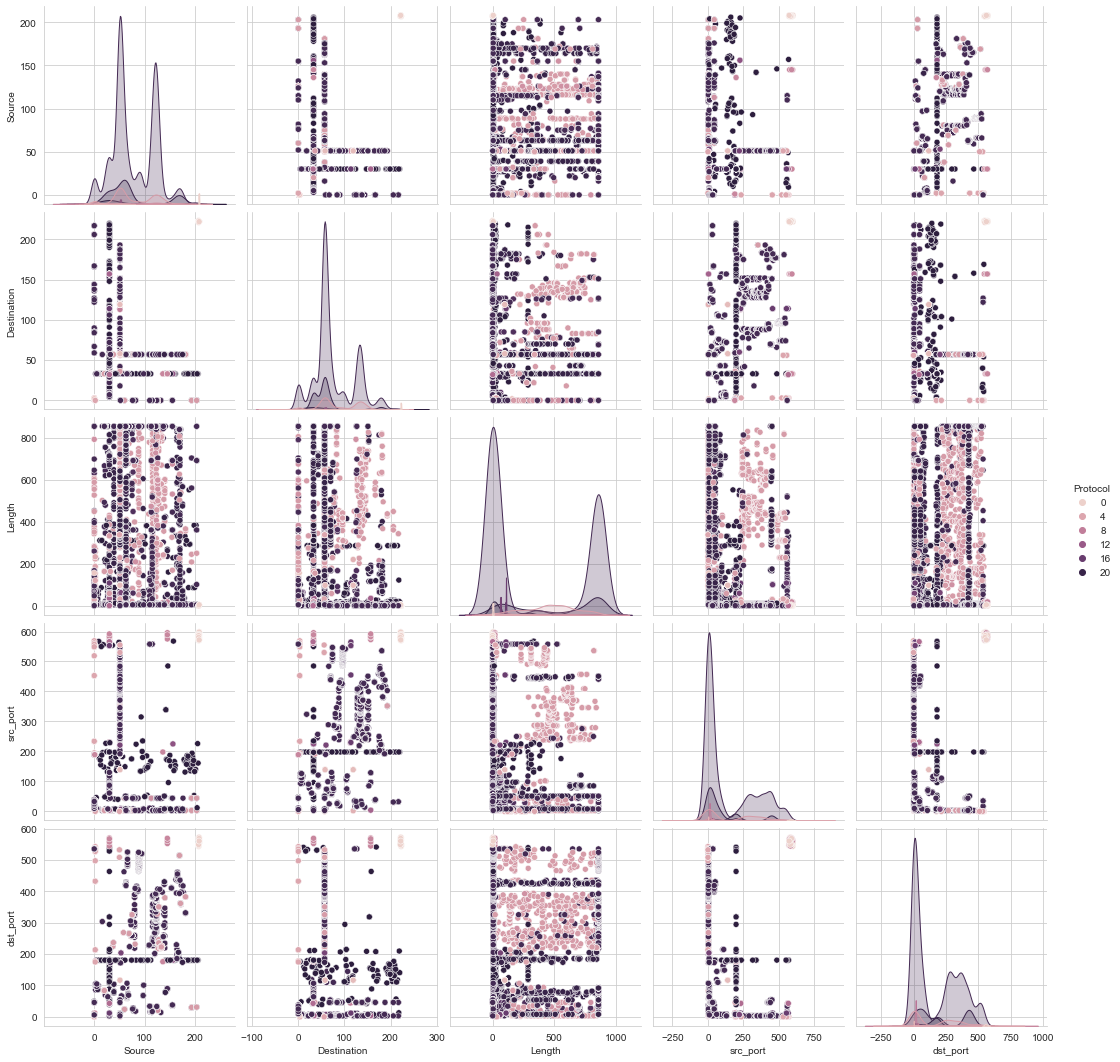

,Source,Destination,Protocol,Length,src_port,dst_port
1,51,181,5,631,414,3
2,169,57,5,275,3,394
3,51,176,19,11,236,3
4,51,181,19,1,414,3
5,164,57,19,11,3,216
...,...,...,...,...,...,...
14257,0,125,19,1,33,46
14258,51,119,2,98,139,117
14259,51,58,2,98,139,117
14260,51,119,2,98,139,117


In [11]:
plt.close();
sns.set_style('whitegrid');

tmp_df = data_frame

try:
    del tmp_df['Time']
    del tmp_df['Info']
except:
    pass

encoded_data_frame = tmp_df.apply(preprocessing.LabelEncoder().fit_transform)

sns.pairplot(encoded_data_frame, hue='Protocol', height=3);
plt.show()

encoded_data_frame

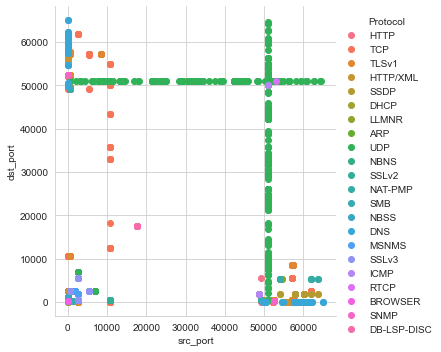

In [12]:
sns.set_style('whitegrid');
sns.FacetGrid(data_frame, hue='Protocol', size=5) \
.map(plt.scatter, 'src_port', 'dst_port') \
.add_legend();
plt.show()